## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [2]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [3]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X,Y,test_size=0.1)
X_train,X_val,Y_train,Y_val = train_test_split(X_train_val,Y_train_val,test_size=0.22)
### END CODE HERE ###

## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?
**Answer**: Based on the code below, the best value of c is 0.00057


In [4]:
### START CODE HERE ###
C_values = np.linspace(5e-5, 5e-1, 20)
best_C = None
best_accuracy = 0

for C in C_values:
    clf = LogisticRegression(C=C,solver='liblinear')
    clf.fit(X_train,Y_train)
    accuracy = clf.score(X_val,Y_val)
    if accuracy > best_accuracy:
        best_C = C
        best_accuracy = accuracy
print('best accuracy on validation set', best_accuracy)
print("Best value of C:", best_C)
### END CODE HERE ###

best accuracy on validation set 0.9380530973451328
Best value of C: 0.0031763157894736846


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**:Accuracy on test set: 0.947


In [ ]:
### START CODE HERE ###
clf = LogisticRegression(C=best_C,solver='liblinear')
clf.fit(X_train_val,Y_train_val)
test_accuracy = clf.score(X_test,Y_test)

print("Accuracy on test set:", test_accuracy)
### END CODE HERE ###

Accuracy on test set: 0.9473684210526315


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

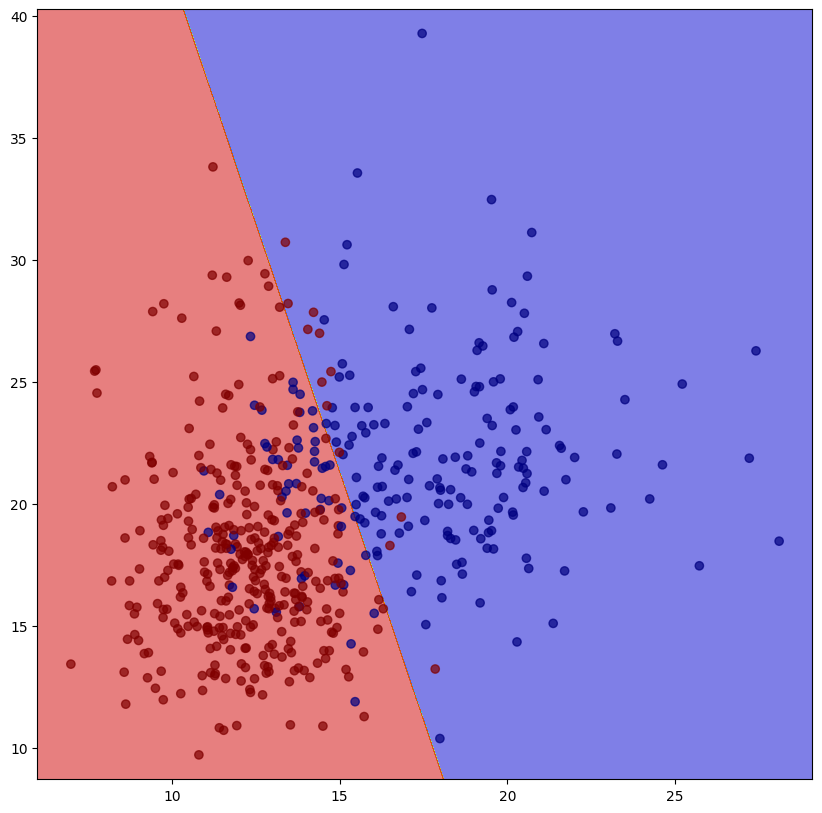

In [5]:
### START CODE HERE ###


import matplotlib.pyplot as plt

X_2d = X[:, :2]
Y_2d = Y

clf_lda_2d = LinearDiscriminantAnalysis()
clf_lda_2d.fit(X_2d,Y_2d)

x_min,x_max=X_2d[:,0].min()-1,X_2d[:,0].max()+1
y_min,y_max=X_2d[:,1].min()-1,X_2d[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.01),np.arange(y_min,y_max,.01))
z=clf_lda_2d.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.contourf(xx,yy,z,alpha=.5,cmap='jet')
plt.scatter(X_2d[:,0],X_2d[:,1],c=Y_2d,cmap='jet',alpha=0.7)
plt.show()

### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: Accuracy of Naive Bayes on test set: 0.894

In [6]:
### START CODE HERE ###



clf = GaussianNB()
clf.fit(X_train,Y_train)
test_accuracy_nb = clf.score(X_test,Y_test)

print("Accuracy of Naive Bayes on test set:", test_accuracy_nb)

### END CODE HERE ###

Accuracy of Naive Bayes on test set: 0.8947368421052632


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: Accuracy of LDA on test set: 0.929


In [7]:
### START CODE HERE ###
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,Y_train)
test_accuracy_lda = clf.score(X_test,Y_test)

print("Accuracy of LDA on test set:", test_accuracy_lda)

### END CODE HERE ###

Accuracy of LDA on test set: 0.9298245614035088


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: The best classifier is Logistic Regression and its accuracy on the test set 0.947